
- Мы используем функцию активации ReLU для скрытых слоев и softmax для выходного слоя, что подходит для задачи многоклассовой классификации.
- Количество эпох увеличено до 10 для более глубокого обучения.
- Размер партии (batch size) увеличен до 64 для более эффективного обучения.
- Добавлены два скрытых слоя с 128 и 64 нейронами соответственно, что может помочь модели лучше улавливать сложные зависимости в данных.
- Используется оптимизатор Adam с настраиваемым коэффициентом обучения 0.001 для более тонкой настройки процесса обучения.

Эти изменения могут помочь улучшить производительность модели на датасете MNIST

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8575 - loss: 0.4993 - val_accuracy: 0.9581 - val_loss: 0.1439
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9636 - loss: 0.1222 - val_accuracy: 0.9689 - val_loss: 0.1029
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9781 - loss: 0.0765 - val_accuracy: 0.9726 - val_loss: 0.0882
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9822 - loss: 0.0575 - val_accuracy: 0.9732 - val_loss: 0.0876
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9856 - loss: 0.0455 - val_accuracy: 0.9768 - val_loss: 0.0745
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9729 - val_loss: 0.0888
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9914 - loss: 0.0287 - val_accuracy: 0.9749 - val_loss: 0.0844
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9915 - loss: 0.0255 - val_accuracy: 0.

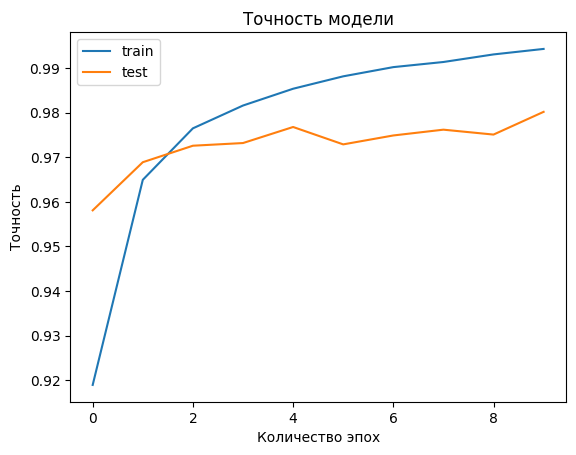

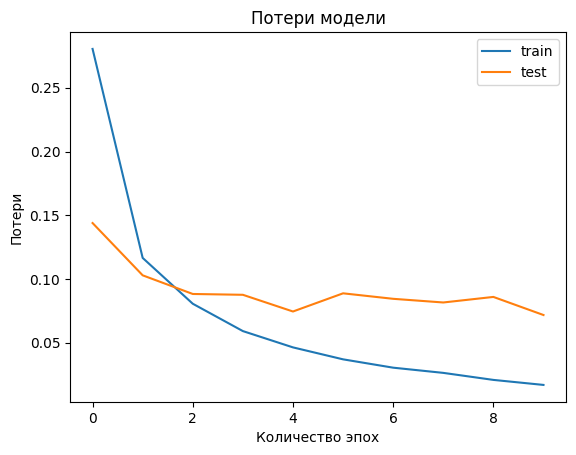

In [3]:
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam

# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

# Преобразование меток в one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Определение модели
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, batch_size=64,
                    epochs=10, validation_data=(x_test, y_test))

# Оценка модели
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точность модели:', test_acc)

# Визуализация результатов

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Точность модели')
plt.xlabel('Количество эпох')
plt.ylabel('Точность')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Потери модели')
plt.xlabel('Количество эпох')
plt.ylabel('Потери')
plt.legend()
plt.show()

Из предоставленных результатов обучения нейросети на датасете MNIST видно, что модель достигла довольно высокой точности на валидационном наборе данных. В последней эпохе обучения точность модели на валидационном наборе достигла 98.02%, что является очень хорошим результатом для задачи классификации изображений.

- Точность на обучающем наборе данных: В последней эпохе обучения точность на обучающем наборе данных составила 99.46%, что указывает на то, что модель хорошо обучилась и способна правильно классифицировать большинство изображений из обучающего набора.
- Точность на валидационном наборе данных: В последней эпохе обучения точность на валидационном наборе данных составила 98.02%, что является очень хорошим показателем. Это означает, что модель способна обобщать информацию и хорошо работает на данных, которые она ранее не видела.
- Потери на обучающем и валидационном наборах данных: Потери на обучающем наборе данных в последней эпохе составили 0.0159, а на валидационном наборе данных — 0.0717. Это указывает на то, что модель эффективно обучается и сходится к оптимальному решению.  

В целом, эти результаты указывают на то, что модель обучена достаточно хорошо и способна достигать высокой точности на задаче классификации изображений из датасета MNIST.

---

Из документации Keras и дополнительных источников можно выделить несколько полезных команд и функций, которые могут быть полезны для работы с нейронными сетями в Keras, но не были разобраны на уроке:

1. Сохранение и загрузка модели: После обучения модели можно сохранить ее в файл для последующего использования, а затем загрузить из этого файла, чтобы продолжить обучение или использовать модель для предсказаний. Это удобно для сохранения прогресса и повторного использования моделей.

```python
# Сохранение модели
model.save('my_model.h5')

# Загрузка модели
from keras.models import load_model
model = load_model('my_model.h5')
```

2. Суммирование модели: Функция `model.summary()` позволяет получить краткое описание архитектуры модели, включая количество слоев, их типы и количество параметров. Это полезно для проверки структуры модели и понимания, как она будет обрабатывать данные.

```python
model.summary()
```

3. Использование функционального API Keras: В дополнение к последовательному API, Keras предлагает функциональный API, который позволяет создавать более сложные архитектуры моделей, включая модели с несколькими входами/выходами, модели с разветвлениями и циклами.

```python
from keras.layers import Input, Dense
from keras.models import Model

# Определение входного слоя
input_layer = Input(shape=(10,))

# Определение слоя
dense_layer = Dense(32, activation='relu')(input_layer)

# Определение выходного слоя
output_layer = Dense(1, activation='sigmoid')(dense_layer)

# Создание модели
model = Model(inputs=input_layer, outputs=output_layer)
```

4. Разделение на обучающий и тестовый наборы данных: Для оценки производительности модели на новых данных, которые она ранее не видела, важно разделить исходный набор данных на обучающий и тестовый наборы. Это позволяет оценить, насколько хорошо модель может обобщать информацию на новых данных.

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
